# Recommendation System - Project

In [1]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808326 sha256=42f0d2607a06f3f026dbb151ce9cfe116e3a927ed9d1442df9bdd10fada86777
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightfm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Recsy'

df_articles = pd.read_csv(path + '/articles.csv')
df_customer = pd.read_csv(path + '/customers.csv')
df_transactions = pd.read_csv(path + '/transactions_train.csv')


# 1. Data Analysis

## Overview of the data

**customer.csv:** contains inforation about the customers

In [6]:
df_customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


**articles.csv:** contains insformation about the articles purchased

In [7]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


**transactions.csv:** contains the information about the transactions made

In [8]:
df_transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [16]:
#number of unique customers
print('Number of unique customers: ', '{:,}'.format(df_customer['customer_id'].nunique()))
#number of unique articles
print('Number of unique articles: ', '{:,}'.format(df_articles['article_id'].nunique()))
#number of unique transactions
print('Number of unique articles: ', '{:,}'.format(df_transactions.shape[0]))


Number of unique customers:  1,371,980
Number of unique articles:  105,542
Number of unique articles:  31,788,324


In [19]:
#check for missing values in %
df_customer.isnull().mean().apply(lambda x: round(x,2)) * 100

,0
customer_id,0.0
FN,65.0
Active,66.0
club_member_status,0.0
fashion_news_frequency,1.0
age,1.0
postal_code,0.0


We will likely diregard FN and Active columns since about 65% is missing

In [28]:
#check for missing values in %
df_articles.isnull().mean().apply(lambda x: round(x,4)) * 100

,0
article_id,0.00
product_code,0.00
prod_name,0.00
product_type_no,0.00
product_type_name,0.00
product_group_name,0.00
graphical_appearance_no,0.00
graphical_appearance_name,0.00
colour_group_code,0.00
colour_group_name,0.00


In [25]:
#check for missing values in %
df_transactions.isnull().mean() * 100

,0
t_dat,0.0
customer_id,0.0
article_id,0.0
price,0.0
sales_channel_id,0.0


In [29]:
#number of interactions per customer
df_transactions['customer_id'].value_counts()

,count
customer_id,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f,1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6,1237
...,...
63b70b71291668f0a63ade8e321fb3eccb80eba164f2087dad471de065f18e1f,1
950b172c36d169bf427545991fe66371f21a085799b44780fdcb2da6a3091613,1
7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3eaadc21993ea45fc69,1


In [30]:
#number of interactions per article
df_transactions['article_id'].value_counts()

,count
article_id,
706016001,50287
706016002,35043
372860001,31718
610776002,30199
759871002,26329
...,...
520736002,1
619777003,1
586904003,1


In [31]:
# return list of most 5 popular articles
most_pop_articles =  df_transactions['article_id'].value_counts().head(5).index.tolist()
df_articles[df_articles['article_id'].isin(most_pop_articles)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1713,372860001,372860,7p Basic Shaftless,302,Socks,Socks & Tights,1010016,Solid,9,Black,...,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit trainer socks in a soft cotton blend.
24837,610776002,610776,Tilly (1),255,T-shirt,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53893,706016002,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,71,Light Blue,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
70221,759871002,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,EQ Divided Basics,D,Divided,2,Divided,80,Divided Complements Other,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr..."


In [32]:
#number of articles per product type
df_articles['product_type_name'].value_counts()

,count
product_type_name,
Trousers,11169
Dress,10362
Sweater,9302
T-shirt,7904
Top,4155
...,...
Keychain,1
Headband,1
Cushion,1


<Axes: xlabel='quarter'>

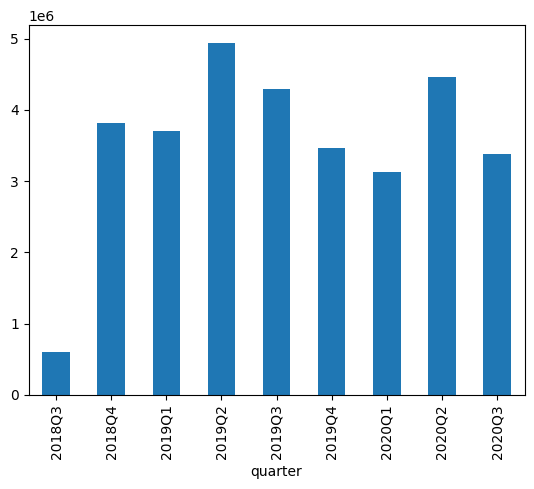

In [33]:
#plot number of transactions per quarters
df_transactions['date'] = pd.to_datetime(df_transactions['t_dat'])
df_transactions['quarter'] = df_transactions['date'].dt.year.astype(str) + 'Q' + df_transactions['date'].dt.quarter.astype(str)
df_transactions['quarter'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='Frequency'>

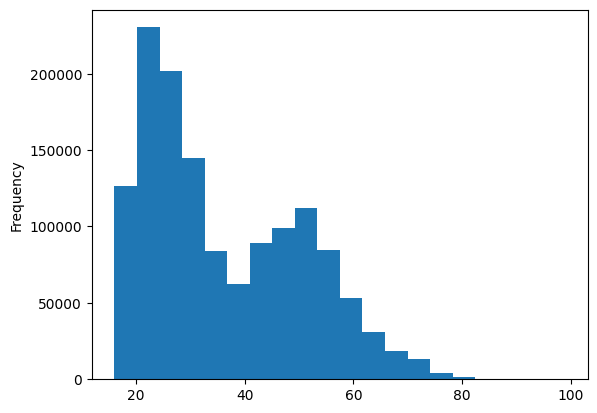

In [35]:
#plot hist or customers age
df_customer['age'].plot(kind='hist', bins=20)

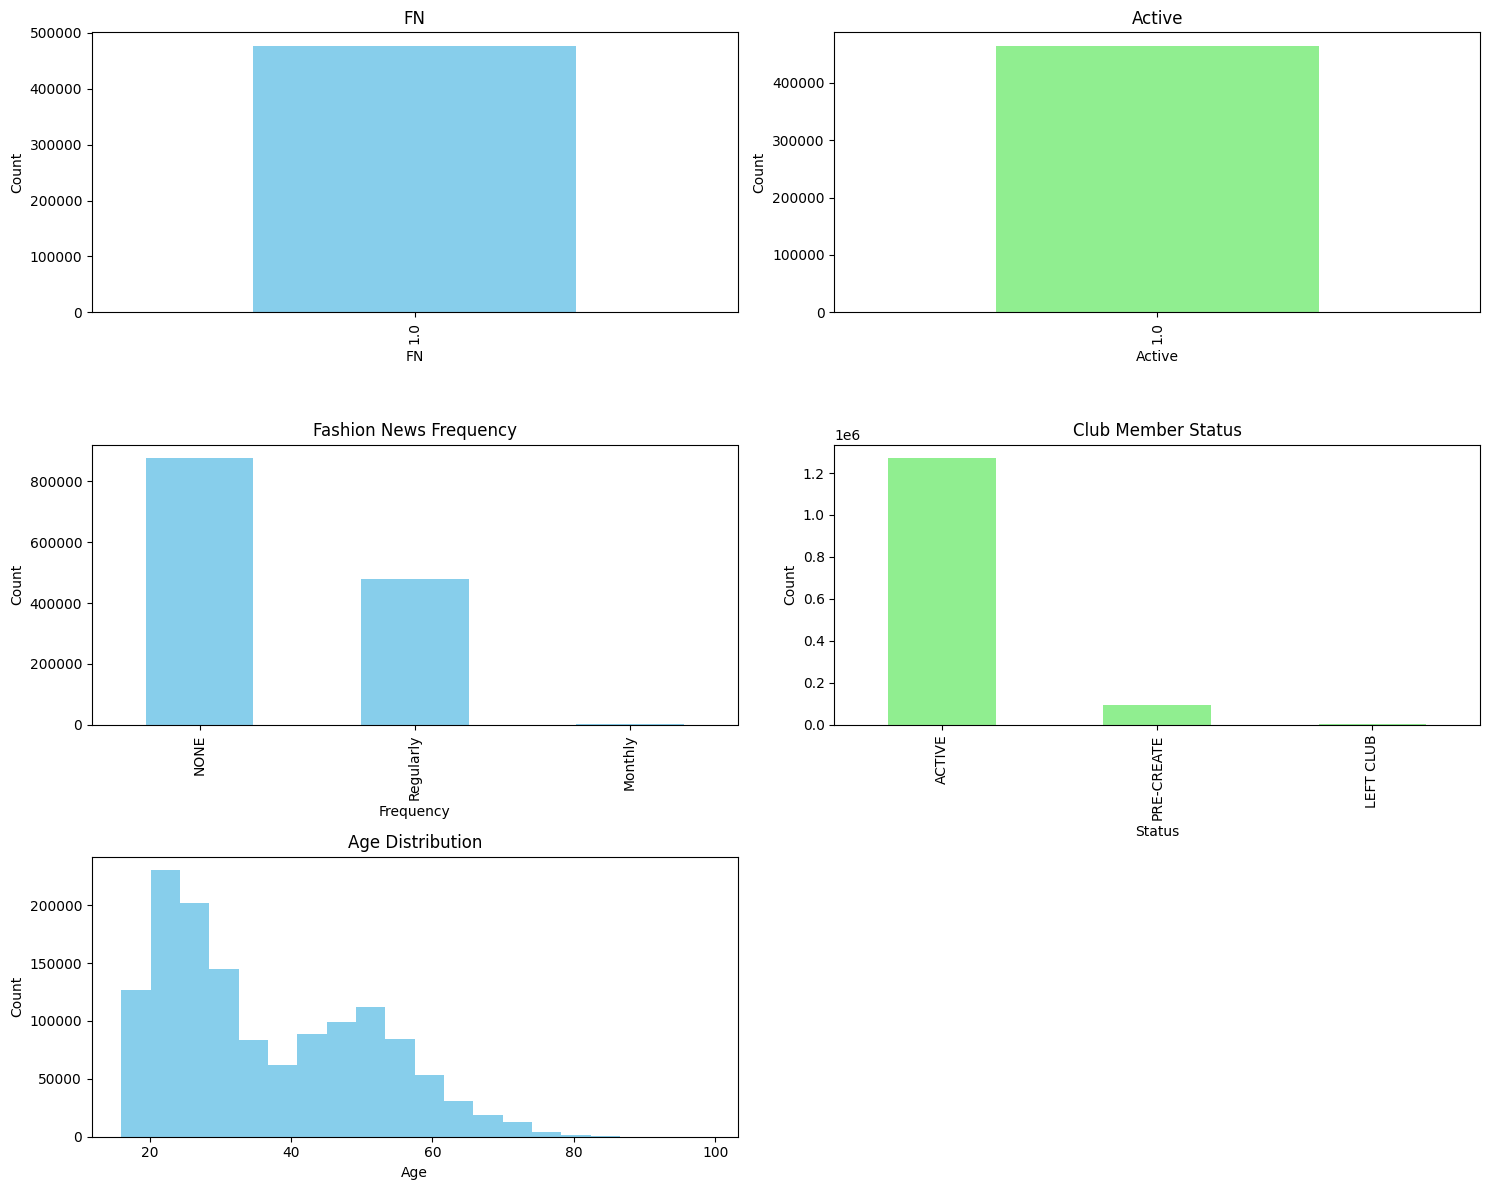

In [37]:
# Create a figure and axis objects for six subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns

# Plot for 'FN'
df_customer['FN'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('FN')
axes[0, 0].set_xlabel('FN')
axes[0, 0].set_ylabel('Count')

# Plot for 'Active'
df_customer['Active'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Active')
axes[0, 1].set_xlabel('Active')
axes[0, 1].set_ylabel('Count')

# Plot for 'fashion_news_frequency'
df_customer['fashion_news_frequency'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Fashion News Frequency')
axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Count')

# Plot for 'club_member_status'
df_customer['club_member_status'].value_counts().plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Club Member Status')
axes[1, 1].set_xlabel('Status')
axes[1, 1].set_ylabel('Count')

# Plot for 'age'
df_customer['age'].plot(kind='hist', bins=20, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Age Distribution')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Count')

# Remove the empty subplot in (2, 1)
axes[2, 1].axis('off')  # Optionally, turn off the last unused subplot

# Show the combined plot
plt.tight_layout()
plt.show()

We see that Fn and Active are useless. Fashion News and Status are not disciminative enough.
We may use only the age.

In [38]:
#sparcity calculation
total_possible_interactions = df_customer.shape[0] * df_articles.shape[0]
actual_interactions = df_transactions.shape[0]
sparsity = 1 - (actual_interactions / total_possible_interactions)

print('Sparsity: ', sparsity)


Sparsity:  0.9997804696697825


The sparsity value of 0.99978 indicates that the user-item interaction matrix is highly sparse. This means that only about 0.022% of the possible user-item combinations have interactions, while 99.978% are zeros (i.e., no interactions). Such high sparsity is common in recommendation system datasets, particularly in scenarios where there are a large number of users and items, but each user interacts with only a small subset of items.

Implications of High Sparsity
1. Cold Start Problem
2. Overfitting Risk
3. Biased Recommendations

<ipython-input-39-ca2a14040a7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_top_5['quarter'] = pd.to_datetime(df_transactions_top_5['t_dat']).dt.year.astype(str) + 'Q' + pd.to_datetime(df_transactions_top_5['t_dat']).dt.quarter.astype(str)


<Axes: xlabel='quarter'>

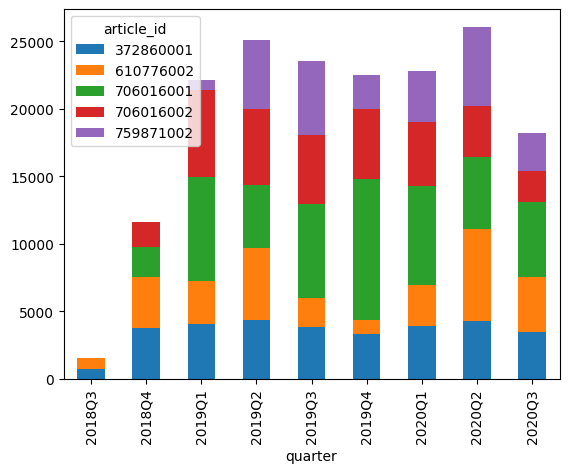

In [39]:
#historical trend of top 5 articles
top_5_articles = df_transactions['article_id'].value_counts().head(5).index.tolist()
df_transactions_top_5 = df_transactions[df_transactions['article_id'].isin(top_5_articles)]
df_transactions_top_5['quarter'] = pd.to_datetime(df_transactions_top_5['t_dat']).dt.year.astype(str) + 'Q' + pd.to_datetime(df_transactions_top_5['t_dat']).dt.quarter.astype(str)
df_transactions_top_5.groupby(['quarter', 'article_id']).size().unstack().plot(kind='bar', stacked=True)


## Conclusion

This section provided an overview of the customers, articles, and transactions datasets, highlighting key characteristics and potential areas for further analysis.

Customer data: It was found that the FN and Active columns have a high percentage of missing values and might not be useful for the recommendation system. The age feature could be useful.

Article data: This dataset was found to be complete with no missing values. The analysis revealed the distribution of articles across different product types.

Transactions data: The transaction data showed the purchase history of customers. The data revealed the most popular articles, the sparsity of the data, and the purchase trends over time.

These initial insights will guide the data sampling, processing and model building stages.

# 2. Data Sampling

Given our dataset is very large and hard to train, we want to sample it for experimenting. We need to ensure that the sample is a good representation of the data set. We will see 3 different approaches here.

**Based on date:** first approach is to separate our dataset according to the transaction date. We can train our model on a recent period assuming the distribution is conistsent over time.

In [20]:
#based on the date
df_timebasedsample =  df_transactions.copy()
df_timebasedsample['date'] = pd.to_datetime(df_timebasedsample['t_dat'])
df_timebasedsample = df_timebasedsample[df_timebasedsample['date'] > '2020-06-30']

print('Number of unique customers: ', df_timebasedsample.shape[0])

df_timebasedsample.to_csv(path + '/sampling/time_based/' + 'transactions_timebased.csv', index=False)
df_customer[df_customer['customer_id'].isin(df_timebasedsample['customer_id'].unique())].to_csv(path + '/sampling/time_based/' +  'customers_timebased.csv', index=False)
df_articles[df_articles['article_id'].isin(df_timebasedsample['article_id'].unique())].to_csv(path + '/sampling/time_based/' + 'articles_timebased.csv', index=False)

Number of unique customers:  3386963


**Based on Activity:** second approach is to sample our datset according to the number of interaction per user in order to keep a similar distribution in our sample.

In [21]:
# Based on calculated user activity (number of interactions per user)
user_activity = df_transactions['customer_id'].value_counts()

# Define bins for user activity
bins = [0, 5, 20, 100, user_activity.max()]  # Example bins: 0-5, 6-20, 21-100, 100+
labels = ['low', 'medium', 'high', 'very_high']
user_bins = pd.cut(user_activity, bins=bins, labels=labels)

# Sample 10% of users from each bin
sampled_users = pd.concat([
    user_activity[user_bins == label].sample(frac=0.01, random_state=42)
    for label in labels
])

# Filter the original transactions for the sampled users
df_activitysample = df_transactions[df_transactions['customer_id'].isin(sampled_users.index)]

print('Number of sampled users: ', sampled_users.shape[0])

df_activitysample.to_csv(path + '/sampling/activity_based/' +  'transactions_activitybased.csv', index=False)
df_customer[df_customer['customer_id'].isin(df_activitysample['customer_id'].unique())].to_csv(path + '/sampling/activity_based/' + 'customers_activitybased.csv', index=False)
df_articles[df_articles['article_id'].isin(df_activitysample['article_id'].unique())].to_csv(path + '/sampling/activity_based/' + 'articles_activitybased.csv', index=False)


Number of sampled users:  13623


**Based on popular items:** last idea, is to keep only popular items in our sample, we assume that it's useless to suggest unpopular items to customers so no need to train our model with this data.

In [111]:
# Identify the top 1% most popular items
top_items = df_transactions['article_id'].value_counts().head(int(0.01 * len(df_transactions['article_id'].unique()))).index

# Filter transactions to include only those with the top items
df_popularitysample = df_transactions[df_transactions['article_id'].isin(top_items)]

# Optionally, further sample the transactions to make it more manageable
df_popularitysample = df_popularitysample.sample(frac=0.01, random_state=42)

print('Number of transactions in the popularity sample: ', df_popularitysample.shape[0])

df_popularitysample.to_csv(path + '/sampling/popularity_based/' + 'transactions_popularitybased.csv', index=False)
df_customer[df_customer['customer_id'].isin(df_popularitysample['customer_id'].unique())].to_csv(path + '/sampling/popularity_based/' + 'customers_popularitybased.csv', index=False)
df_articles[df_articles['article_id'].isin(df_popularitysample['article_id'].unique())].to_csv(path + '/sampling/popularity_based/' + 'articles_popularitybased.csv', index=False)

Number of transactions in the popularity sample:  59174


# 3. Data Processing


In [164]:
sampling_type = '/sampling/popularity_based/'

df_customer_sample = pd.read_csv(path + sampling_type + 'customers_popularitybased.csv')
df_articles_sample = pd.read_csv(path + sampling_type +  'articles_popularitybased.csv')
df_transactions_sample = pd.read_csv(path + sampling_type +  'transactions_popularitybased.csv')

## 1. Encode Customer and Article IDs

For efficiency, we need to encode our data.

In [302]:
from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(df_transactions_sample['customer_id'],
            df_transactions_sample['article_id'])

In [303]:
num_users, num_items = dataset.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))

Num users: 54777, num_items 1045.


In [304]:
#create article features mapping
dataset.fit_partial(items=df_articles_sample['article_id'],
                    users=df_customer_sample['customer_id']
                    )

## 2. Create User-Item Interaction Matrix

This sparse matrix will represent the interactions between the customers and the articles in a format lighfm can process

In [305]:
(interactions, weights) = dataset.build_interactions(((row['customer_id'], row['article_id'])
                                                      for index, row in df_transactions_sample.iterrows()))

print(repr(interactions))

<54777x1045 sparse matrix of type '<class 'numpy.int32'>'
	with 59174 stored elements in COOrdinate format>


# 4. Train Test Split

In [306]:
#train test split
from lightfm.cross_validation import random_train_test_split

train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(42))


# 5. Train Model

In [307]:
from lightfm import LightFM

#train naive model without features
model = LightFM(loss='warp', no_components=10, learning_rate=0.05, random_state=42)
model.fit(train, epochs=50, verbose=True)


Epoch: 100%|██████████| 50/50 [00:02<00:00, 23.05it/s]


# 6. Evaluation

In [312]:
def train_loop(model, epoch=10, step=1, user_features=None, item_features=None, no_components=10, learning_rate=0.05):

    for e in range(1, epoch, step):

      model = LightFM(loss='warp', no_components=no_components, learning_rate=learning_rate, random_state=42)
      model.fit(train, user_features=user_features, item_features=item_features, epochs=e, verbose=True)
      auc_train.append(auc_score(model, train, user_features=user_features, item_features=item_features).mean())
      auc_test.append(auc_score(model, test, user_features=user_features, item_features=item_features).mean())
      epoch_.append(e)

      print(f"Epoch: {epoch}, AUC train: {auc_train[-1]}, AUC test: {auc_test[-1]}")

    return model, auc_train, auc_test

In [313]:
# loop on epoch to see how training is improving
auc_train = []
auc_test = []
epoch_ = []
e = 50
step = 5
no_components = 10
learning_rate = 0.05

model, auc_train, auc_test = train_loop(model, epoch=e, step=step, no_components=no_components, learning_rate=learning_rate)


Epoch: 100%|██████████| 1/1 [00:00<00:00, 19.49it/s]


Epoch: 50, AUC train: 0.6129667162895203, AUC test: 0.6004909873008728


Epoch: 100%|██████████| 6/6 [00:00<00:00, 21.11it/s]


Epoch: 50, AUC train: 0.9631039500236511, AUC test: 0.611230731010437


Epoch: 100%|██████████| 11/11 [00:00<00:00, 20.75it/s]


Epoch: 50, AUC train: 0.9967765808105469, AUC test: 0.5946641564369202


Epoch: 100%|██████████| 16/16 [00:01<00:00, 13.10it/s]


Epoch: 50, AUC train: 0.9986441731452942, AUC test: 0.5865908265113831


Epoch: 100%|██████████| 21/21 [00:00<00:00, 21.01it/s]


Epoch: 50, AUC train: 0.9989942908287048, AUC test: 0.5833067893981934


Epoch: 100%|██████████| 26/26 [00:01<00:00, 22.05it/s]


Epoch: 50, AUC train: 0.9991394281387329, AUC test: 0.5817388892173767


Epoch: 100%|██████████| 31/31 [00:01<00:00, 21.42it/s]


Epoch: 50, AUC train: 0.999236524105072, AUC test: 0.580815315246582


Epoch: 100%|██████████| 36/36 [00:02<00:00, 14.02it/s]


Epoch: 50, AUC train: 0.9992957711219788, AUC test: 0.580223798751831


Epoch: 100%|██████████| 41/41 [00:01<00:00, 22.88it/s]


Epoch: 50, AUC train: 0.9993429780006409, AUC test: 0.5794727206230164


Epoch: 100%|██████████| 46/46 [00:02<00:00, 22.26it/s]


Epoch: 50, AUC train: 0.9993768930435181, AUC test: 0.5791666507720947


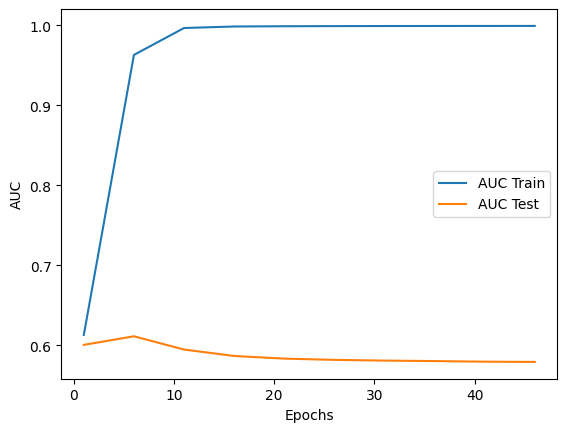

In [314]:
#plot
plt.plot(epoch_, auc_train, label='AUC Train')
plt.plot(epoch_, auc_test, label='AUC Test')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [235]:
auc_train.append(auc_score(model, train).mean())
auc_test.append(auc_score(model, test).mean())

print(f"AUC train: {auc_train[-1]}")
print(f"AUC test: {auc_test[-1]}")

AUC train: 0.9993768930435181
AUC test: 0.5791666507720947


While the model showed a good fit to the training data (AUC train reaching 0.99), its performance on the test set remained relatively low and are drecresing over the training (AUC test around 0.6).
This discrepancy suggests that the model is likely overfitting and not generalizing well to unseen data.

In [236]:
#precision at k
precision = precision_at_k(model, test, k=5).mean()

print(f"Precision: {precision}")

Precision: 0.006029891315847635


**Conclusion:**

That's a very low precision score, indicating that your model isn't recommending relevant items effectively. Precision@k measures the proportion of recommended items that are actually relevant to the user. In this case, a precision of 0.0078 means that only about 0.78% of the top 5 recommendations (k=5) are relevant.

# 7. Prediction

In [237]:
#make an example
score = model.predict(0, [0, 1])
itemid = list(dataset.mapping()[2].keys())[list(dataset.mapping()[2].values()).index(0)]
userid = list(dataset.mapping()[1].keys())[list(dataset.mapping()[1].values()).index(0)]
print("Score for articleid {0} = {1} for customer {2}".format(itemid, score[0], userid))


Score for articleid 688873001 = 2.6951277256011963 for customer 677630243b440770bbde2d08f2d0e570e3728b99be0fc774ccdcc45bc6b2d472


In [126]:
df_articles_sample[df_articles_sample['article_id'] == itemid]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [127]:
df_customer_sample[df_customer_sample['customer_id'] == userid]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bin
0,0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...,1.0,1.0,ACTIVE,Regularly,30.0,7c902dca60ee0bd0f9030eefd445d11146e8d24835738a...,1


# 8. Hybrid recommendation with Fetaures


In [315]:
#features possible
print(df_customer_sample.columns)
print(df_articles_sample.columns)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'age_bin',
       'fashion_news_frequency_encoded', 'club_member_status_encoded'],
      dtype='object')
Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [316]:
#encode features engineering
# create age_bin feature
df_customer_sample['age_bin'] = pd.cut(df_customer_sample['age'], bins=[0, 18, 30, 45, 60, 100], labels=[0, 1, 2, 3, 4])

#encore fashion_news_frequency
df_customer_sample['fashion_news_frequency'] = df_customer_sample['fashion_news_frequency'].replace(np.nan, 'nan')
df_customer_sample['fashion_news_frequency_encoded'] = df_customer_sample['fashion_news_frequency'].map({'NONE': 0, 'Regularly': 1, 'Monthly':2, 'nan':3})

#encode club member status
df_customer_sample['club_member_status'] = df_customer_sample['club_member_status'].replace(np.nan, 'nan')
df_customer_sample['club_member_status_encoded'] = df_customer_sample['club_member_status'].map({'ACTIVE': 0, 'PRE-CREATE': 1, 'LEFT CLUB': 2, 'nan':3})

In [317]:
#create article features mapping
from lightfm.data import Dataset

dataset = Dataset()

#we choose our features
item_features_col = ['product_type_no', 'perceived_colour_value_id', 'index_group_no', 'section_no', 'garment_group_no']
user_features_col = ['age_bin', 'fashion_news_frequency_encoded', 'club_member_status_encoded']

dataset.fit_partial(items=df_articles_sample['article_id'],
                    users=df_customer_sample['customer_id'],
                    item_features=item_features_col,
                    user_features=user_features_col)

In [318]:
item_feat = df_articles_sample[item_features_col].to_dict(orient='records')

user_feat = df_customer_sample[user_features_col].to_dict(orient='records')

#building article features
item_features = dataset.build_item_features((x,y) for x,y in zip(df_articles_sample['article_id'],item_feat))

#building customer feature
user_features = dataset.build_user_features((x,y) for x,y in zip(df_customer_sample['customer_id'], user_feat))

(interactions, weights) = dataset.build_interactions(((row['customer_id'], row['article_id'])
                                                      for index, row in df_activitysample.iterrows()))

print(repr(interactions))

#train test split
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(42))

<54777x1045 sparse matrix of type '<class 'numpy.int32'>'
	with 59174 stored elements in COOrdinate format>


In [320]:
# loop on epoch to see how training is improving
auc_train = []
auc_test = []
epoch_ = []
e = 50
step = 10
no_components = 10
learning_rate = 0.05

model, auc_train, auc_test = train_loop(model, epoch=e, step=step, no_components=no_components, learning_rate=learning_rate,
                                        item_features=item_features, user_features=user_features)


Epoch: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]


Epoch: 50, AUC train: 0.514667272567749, AUC test: 0.5110042095184326


Epoch: 100%|██████████| 11/11 [00:01<00:00,  8.52it/s]


Epoch: 50, AUC train: 0.5172574520111084, AUC test: 0.5131867527961731


Epoch: 100%|██████████| 21/21 [00:02<00:00,  8.88it/s]


Epoch: 50, AUC train: 0.518400251865387, AUC test: 0.5142443180084229


Epoch: 100%|██████████| 31/31 [00:03<00:00,  8.75it/s]


Epoch: 50, AUC train: 0.5192356109619141, AUC test: 0.5148624777793884


Epoch: 100%|██████████| 41/41 [00:06<00:00,  6.77it/s]


Epoch: 50, AUC train: 0.5204856991767883, AUC test: 0.5156294703483582


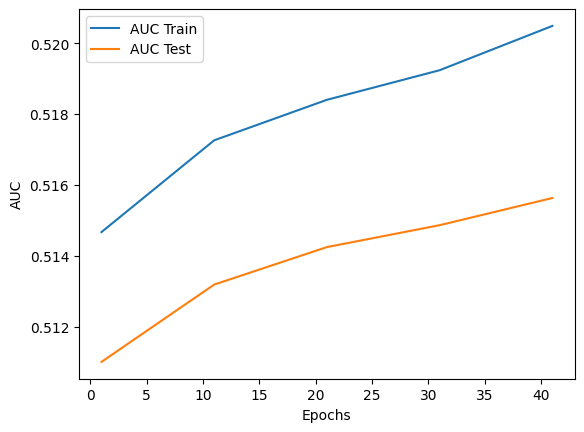

In [321]:
#plot
plt.plot(epoch_, auc_train, label='AUC Train')
plt.plot(epoch_, auc_test, label='AUC Test')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [253]:
#evaluation on test_interactions
auc_train = auc_score(model, train, user_features=user_features, item_features=item_features).mean()
auc_train = auc_score(model, test, user_features=user_features, item_features=item_features).mean()

print(f"AUC train: {auc_train}")
print(f"AUC test: {auc_test}")

AUC train: 0.5158461928367615
AUC test: []


In [200]:
#precision at k routine
precision_test = precision_at_k(model, test, k=5, user_features=user_features, item_features=item_features).mean()

print(f"Precision test: {precision_test}")

Precision test: 0.0007730630459263921


In [201]:
#recall
recall_test = recall_at_k(model, test, k=5, user_features=user_features, item_features=item_features).mean()

print(f"Recall test: {recall_test}")

Recall test: 0.003822367290843498


In [202]:
#make an example
score = model.predict(0, [0, 1])
itemid = list(dataset.mapping()[2].keys())[list(dataset.mapping()[2].values()).index(0)]
userid = list(dataset.mapping()[1].keys())[list(dataset.mapping()[1].values()).index(0)]
print("Score for articleid {0} = {1} for customer {2}".format(itemid, score[0], userid))

Score for articleid 108775015 = 0.12592744827270508 for customer 0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c9199e53dbb81641becd7
